# Modeling Jet Stream Waviness 
### Alyssa Dellinger, Elliana Hebert, Katie-Rose Slade

## Introduction

The scientific theory and model of jet stream waviness plays a pivotal role in our understanding of atmospheric dynamics and climate patterns. The jet stream, a high-altitude, fast-flowing air current, is a key component of the Earth's atmospheric circulation. In recent years, researchers have been increasingly intrigued by the phenomenon of jet stream waviness, characterized by meandering patterns that deviate from the traditional straight and zonal flow. This waviness has been linked to a range of atmospheric and climatic phenomena, including extreme weather events, prolonged periods of heat or cold, and disruptions to regional weather patterns.

Understanding the factors influencing jet stream waviness is crucial for predicting and mitigating the impacts of climate change on a global scale. Scientists employ sophisticated models and theories to investigate the intricate interactions between atmospheric components, such as temperature gradients, pressure systems, and the Coriolis effect, which contribute to the development of jet stream waviness. This research not only enhances our ability to forecast weather patterns but also provides valuable insights into the broader implications of a changing climate on ecosystems, agriculture, and human societies.

The models in our paper focus primarily on how the Linearized Planetary Geostrophic Motion model will change as the zonally asymmetric thermal forcing changes with global warming. They use graphs to depict the flow of the jet stream in the y and z dimensions, in addition to how it looks reflected over the surface of the Earth. Alternatively, our paper focuses on the Linearized Planetary Geostrophic Motion model, and solving it for Phi as a function of height. This will show us how the pressure perturbations in the jet stream change with height. 

## Equations

The fundamental physical processes involved with this model include wind, pressure, rising motion, the coriolous effect and stability. These all contribute to the general understanding of the model and make up different aspects of the Jet stream. 

The principle equation we solved is the Linearized Planetary Geostrophic Motion model. This model is used to describe the large-scale motion of the atmosphere under the influence of the Earth's rotation. The Linearized Planetary Geostrophic Motion model is derived from the linearized steady-state planetary geostrophic equations that are then combined and integrated to produce equation [1]. The Linearized Planetary Geostrophic Motion model equation is as follows:


[1] $$\frac{\partial^2 \phi_{L}}{\partial z} - \frac{1}{H} \frac{\partial\phi_{L}}{\partial z} + \frac{\beta_{L}S}{U} \phi_{L}  = - \Biggl ({k_{S} +\frac{1}{H} \Biggl)}  \frac{Q_{0}}{U} F(x) e^{-k_{s}z}$$

The boundry conditions for the model are required to limit the model to realistic conditions. The boundry conditions are derived from the linearized steady-state planetary geostrophic equations that were used to produce the model. The boundary conditions for the model are as follows:


$$ z=0  \rightarrow \frac{\partial \phi_L }{\partial z}\Biggl |_{z=0} =  \frac{Q_{0}}{U} F(x) $$

$$ z=1  \rightarrow \frac{\partial \phi_L }{\partial z}\Biggl |_{z=1} =  \frac{Q_{0}}{U} F(x)e^{-k_{s}} $$

The Constants used in the equation are defined below:

| Parameter     | Value | Unit | Description |
|:---------:|:---------|:---------| :---------|
| $$ \beta_{L} $$  | 1   | unit?   |   Beta Change |
| H | 0.5   | unit?   | Des.?| 
| S  | 1    | Unit?   | Dimensionless Vertical Stability| 
| U  | 1.5    | Unit?   | Zonal Mean Barotropic Wind|
| $$ K_{s}$$  | 2    | Unit?   | ??|
|  $$ Q_{0}$$  | 0?   | Unit?   | Amplitute of the Zonal Asymetric Forcing|
| F(x)     | $$ sin \frac{2x }{2} $$ | Unit | Description |

The parameters unsed in the code are defined below:

## Numerical methods

Describe the numerical methods used.
Why did you choose to use these methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
import math

#### Define Variables

In [29]:
#define parameters

k_s = 2
beta = 1
H = 0.5
S = 1
U = 0.5

q0 = 0.5 #amplitude of sin(2x)/2

def f(x):
    return np.sin(2*x)/2

def g(x):
    return np.cos(2*x)


## Results

In [30]:
#more parameters
#x(og)=z
#t(og)=x

xf = 6
zf = 1

nx = 100
nz = 100

x = np.linspace(0,xf,nx)
z = np.linspace(0,zf,nz)

dz = z[1]-z[0]
dx = x[1]-x[0]


In [32]:
#Preallocate vectors

phi = np.zeros([nz,nx]) #solution matrix
phi_init = np.zeros([nz,1]) #initial conditions

In [33]:
#boundary conditions

phi[0,0] = (q0*U)*f(x[0]) 
phi[-1,-1] = (q0/U)*f(x[-1])*np.exp(-1*k_s)

In [34]:
#model

for k in range(0,nx-1):
    for i in range(0,nz):
        phi[i,k+1] = (dz**2)/(1+(dz/H))*((k_s+(1/H))*(q0/U)*f(x[k])*np.exp(-1*k_s*z[i])-(1/H)*(phi[i,k]/dz)
                                          +((beta*S)/U)*phi[i,k]+2*phi[i,k]-phi[i-1,k])


## Figures

In [49]:
#U < 4*(H**2)*beta*S
plt.plot(phi,z)
plt.xlabel('$\phi_L$')
plt.ylabel('z')
plt.title('$\phi_L$ as a function of z when $ U < $ 'r'$4 \cdot H^2 \cdot \beta_L \cdot S$'')
plt.show()

SyntaxError: EOL while scanning string literal (2724294699.py, line 5)

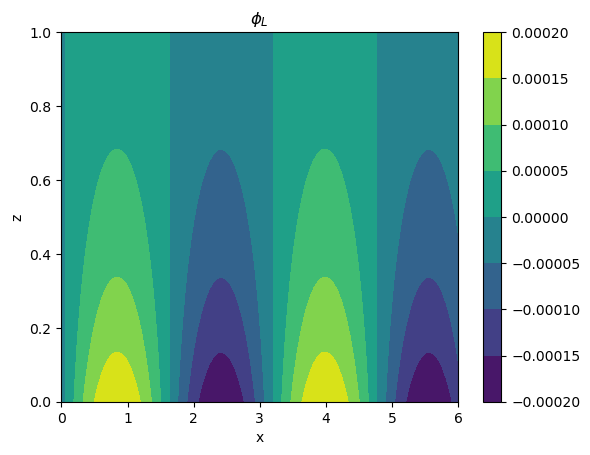

In [36]:
[X,Z] = np.meshgrid(x,z)

plt.contourf(X,Z,phi)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('z')
plt.title('$\phi_L$')
plt.show()

Text(0.5, 0.92, '$\\phi_L$')

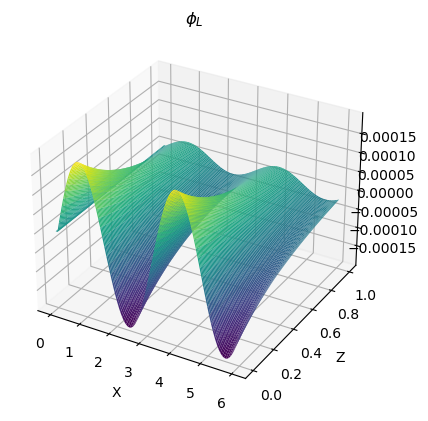

In [37]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot_surface(X,Z,phi, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('surface');
plt.colorbar         
plt.xlabel('X')
plt.ylabel('Z')
plt.title('$\phi_L$')

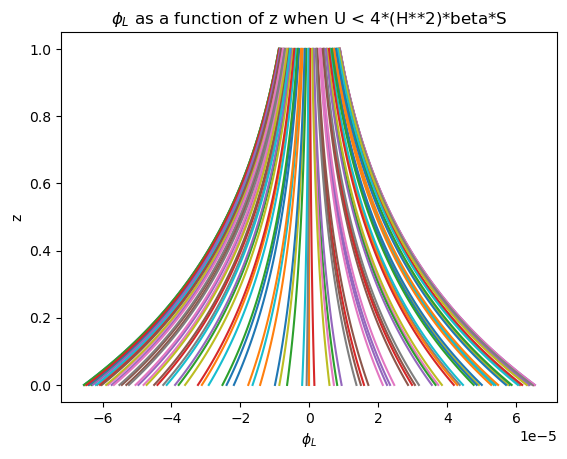

In [21]:
#U > 4*(H**2)*beta*S

#new U
U = 1.5

#new bc's
M[0,0] = (q0*U)*f(x[0]) 
M[-1,-1] = (q0/U)*f(x[-1])*np.exp(-1*k_s)

F_known = np.zeros(nz)
F_known[0] = D*dx/dz

#new model
for k in range(0,nx-1):
    for i in range(0,nz):
        phi[i,k+1] = (dz**2)/(1+(dz/H))*((k_s+(1/H))*(q0/U)*f(x[k])*np.exp(-1*k_s*z[i])-(1/H)*(phi[i,k]/dz)
                                          +((beta*S)/U)*phi[i,k]+2*phi[i,k]-phi[i-1,k])

#new plot
plt.plot(phi,z)
plt.xlabel('$\phi_L$')
plt.ylabel('z')
plt.title('$\phi_L$ as a function of z when U < 4*(H**2)*beta*S')
plt.show()

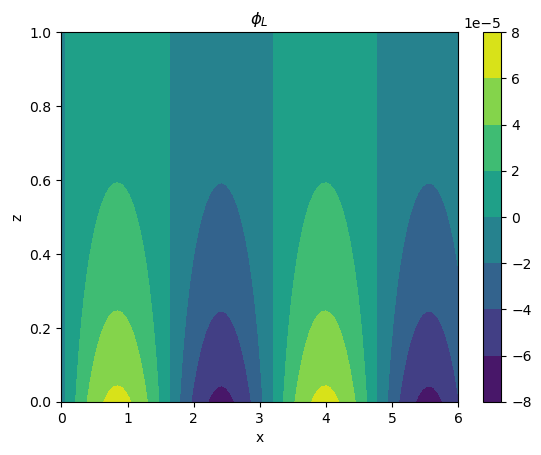

In [22]:
plt.contourf(X,Z,phi)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('z')
plt.title('$\phi_L$: Fig 5')
plt.show()

Text(0.5, 0.92, '$\\phi_L$')

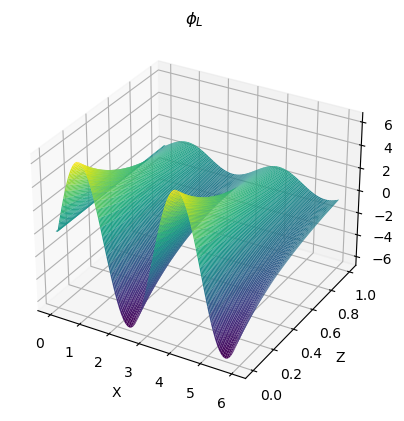

In [23]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot_surface(X,Z,phi, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('surface');
plt.colorbar         
plt.xlabel('X')
plt.ylabel('Z')
plt.title('$\phi_L$: Fig 6')

## References

Moon, Woosok, et al. "Wavier jet streams driven by zonally asymmetric surface thermal forcing." Proceedings of the National Academy of Sciences 119.38 (2022): e2200890119.

OpenAI. "GPT-3.5 (Assistant)." OpenAI, 2022, https://www.openai.com/.
(Helped with understanding how to solve a PDE with only spatial components)

Robel, Alexander. "EarthSystemModelingUG" GitHub, 2022, https://github.com/aarobel/EarthSystemModelingUG.
(Hillslope_erosion_demo.ipynb)

Francis, Jennifer A., and Stephen J. Vavrus. "Evidence for a wavier jet stream in response to rapid Arctic warming." Environmental Research Letters 10.1 (2015): 014005.